We use customer churn to measure why the customers are (leaving/ running away) from your busniess.

"Overall, the combination of non-linear modeling, feature learning capabilities, scalability, flexibility, and integration with deep learning techniques makes ANNs a compelling choice for customer churn prediction tasks."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Loading Dataset**

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Documents/DL datasets/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

# PreProcessing

As the CustomerId has almost 0 effect in predicting the churn, i simply droped it.

The rest we will be using for testing and traning

In [4]:
df1 = df.drop('customerID' , axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking any Invalid values

In [5]:
df1.isnull().sum() # no null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**As Machine learning model only works on numbers we know have to convert the object datatype into numeric type.**

In [6]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Values are in String type**

In [7]:
df1['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Removing the values that have '   ' in it from Totalcharges column.

In [8]:
# [float(i) for i in df1['TotalCharges'].values]
# this erro will be showed

ValueError                                Traceback (most recent call last)

<ipython-input-98-49d1cde5f620> in <cell line: 1>()

----> 1 [float(i) for i in df1['TotalCharges'].values]

2 # [i for i in df['TotalCharges'].values]

3 # float(df['TotalCharges'][0])

<ipython-input-98-49d1cde5f620> in <listcomp>(.0)
----> 1 [float(i) for i in df1['TotalCharges'].values]

2 # [i for i in df['TotalCharges'].values]
      
3 # float(df['TotalCharges'][0])

ValueError: could not convert string to float: ' '

In [9]:
pd.to_numeric(df1['TotalCharges'] , errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

**Getting all the values that are not numeric using pd.to_numeric( errors='coerce') it will convert the non numeric values in 'TotalCharges' to NAN and then using .isnull() we will get all the NAN values**

In [10]:
abc = df1[pd.to_numeric(df1['TotalCharges'] , errors='coerce').isnull()]
abc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [11]:
abc['TotalCharges'].iloc[1]

' '

In [12]:
df1.shape

(7043, 20)

In [13]:
df1 = df1[df1['TotalCharges'] != ' ']
df1.shape # 11 rows are now being deducted

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# making the data type of TotalCharges of from object to float


In [15]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1['TotalCharges'].dtypes

<ipython-input-15-62f5774a8221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


dtype('float64')

# Do visulation

check how much chrun is effected for monthly charges , tenure(loyal customer)

churn_yes means customer is leaving and churn_no means customer is not leaving

In [16]:
churn_yes_tenure = df['tenure'][df['Churn'] == 'Yes']
churn_no_tenure = df['tenure'][df['Churn'] == 'No']

churn_yes_monthly_charges = df['MonthlyCharges'][df['Churn'] == 'Yes']
churn_no_monthly_charges = df['MonthlyCharges'][df['Churn'] == 'No']

# df['tenure'][df['Churn'] == 'Yes']

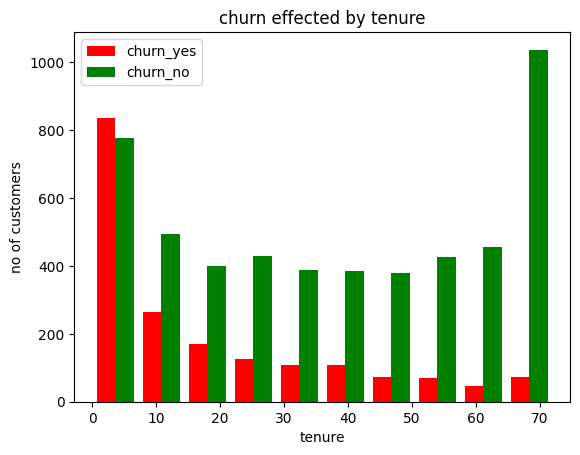

In [17]:
plt.xlabel('tenure')
plt.ylabel('no of customers')
plt.title('churn effected by tenure')
plt.hist([churn_yes_tenure , churn_no_tenure] , color=['red' , 'green'] , label=['churn_yes' , 'churn_no'])
plt.legend() # for showing the label of colors in graph
plt.show() # do now display any addation info except the graph

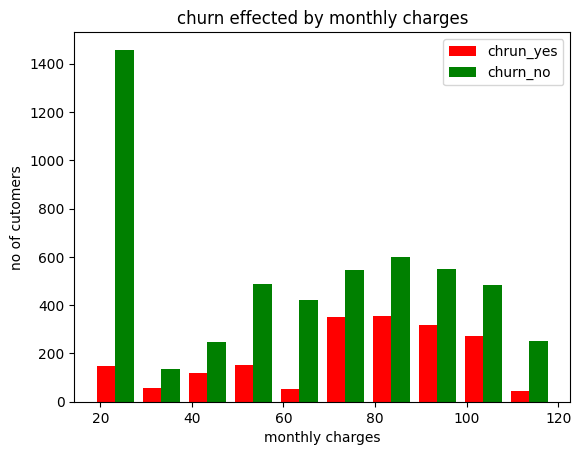

In [18]:
plt.xlabel('monthly charges')
plt.ylabel('no of cutomers')
plt.title('churn effected by monthly charges')
plt.hist([churn_yes_monthly_charges , churn_no_monthly_charges] , color = ['red' , 'green'] , label=['chrun_yes' , 'churn_no'])
plt.legend()
plt.show()

In [19]:
for columns in df1:
    print(columns)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


### Getting the unique Values for all the columns

In [20]:
def unique_values(dataframe):
    for columns in dataframe:
        print(f'{columns}   {dataframe[columns].unique()}')
unique_values(df1)

gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78

# Making the text column numeric

In [21]:
columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
           'PaperlessBilling','Churn','gender']

for col in columns :
    df1[col].replace({'Yes':1 , 'No':0 , 'No internet service':0 , 'No phone service':0,
                      'Male':1 , 'Female':0},inplace=True)


df1.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2164,1,0,1,1,70,1,0,Fiber optic,1,1,1,1,1,0,Two year,1,Credit card (automatic),101.10,6994.80,0
6308,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Electronic check,70.35,139.25,0
2597,1,0,1,0,71,1,1,Fiber optic,1,1,1,0,1,1,One year,1,Electronic check,109.60,7854.15,0
5012,0,0,0,0,12,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.10,223.60,0


In [22]:
unique_values(df1)

gender   [0 1]
SeniorCitizen   [0 1]
Partner   [1 0]
Dependents   [0 1]
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   [0 1]
MultipleLines   [0 1]
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   [0 1]
OnlineBackup   [1 0]
DeviceProtection   [0 1]
TechSupport   [0 1]
StreamingTV   [0 1]
StreamingMovies   [0 1]
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   [1 0]
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   [0 1]


# One hot encoding of remaning columns

In [23]:
df2 = pd.get_dummies(data=df1 , columns=['InternetService' , 'Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [24]:
df2.replace({True : 1 , False : 0} , inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
unique_values(df2)
# all the values are know in numeric form

gender   [0 1]
SeniorCitizen   [0 1]
Partner   [1 0]
Dependents   [0 1]
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   [0 1]
MultipleLines   [0 1]
OnlineSecurity   [0 1]
OnlineBackup   [1 0]
DeviceProtection   [0 1]
TechSupport   [0 1]
StreamingTV   [0 1]
StreamingMovies   [0 1]
PaperlessBilling   [1 0]
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   [0 1]
InternetService_DSL   [1 0]
InternetService_Fiber optic   [0 1]
InternetService_No   [0 1]
Contract_Month-to-month   [1 0]
Contract_One year   [0 1]
Contract_Two year   [0 1]
PaymentMethod_Bank transfer (automatic)   [0 1]
PaymentMethod_Credit card (automatic)   [0 1]
PaymentMethod_Electronic check   [1 0]
PaymentMethod_Mailed check   [0 1]


# Scalling

In [26]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

col = ['tenure','MonthlyCharges','TotalCharges']

df2[col] = mms.fit_transform(df2[col])

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
df2['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [28]:
df2_no = df2[df2['Churn'] == 0]
df2_yes = df2[df2['Churn'] == 1]

print(df2_no.shape)
print(df2_yes.shape)

(5163, 27)
(1869, 27)


In [29]:
df2_yes_sample = df2_yes.sample(df2_no.shape[0] , replace=True)
df2_yes_sample.shape

(5163, 27)

In [30]:
df2 = pd.concat([df2_no,df2_yes_sample])
df2['Churn'].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

# Making Neural network

In [31]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras

In [32]:
x = df2.drop('Churn' , axis=1)
y =df2['Churn']

In [33]:
x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=200)
x_train.shape

(8260, 26)

In [34]:
y_train.head()

2373    0
2973    1
2462    0
2317    0
6520    1
Name: Churn, dtype: int64

In [35]:
df2.shape

(10326, 27)

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(26,)),
    keras.layers.Dense(30 , activation='relu'),
    keras.layers.Dense(15 , activation='relu'),
    keras.layers.Dense(10 , activation='relu'),
    keras.layers.Dense(5 , activation='leaky_relu'),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train , y_train , epochs=200)

Epoch 1/200
259/259 [==============================] - 3s 3ms/step - loss: 0.5795 - accuracy: 0.6972
Epoch 2/200
259/259 [==============================] - 1s 3ms/step - loss: 0.4933 - accuracy: 0.7617
Epoch 3/200
259/259 [==============================] - 1s 3ms/step - loss: 0.4826 - accuracy: 0.7666
Epoch 4/200
259/259 [==============================] - 1s 3ms/step - loss: 0.4770 - accuracy: 0.7660
Epoch 5/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.7697
Epoch 6/200
259/259 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7715
Epoch 7/200
259/259 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7701
Epoch 8/200
259/259 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7731
Epoch 9/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.7751
Epoch 10/200
259/259 [==============================] - 1s 3ms/step - loss: 0.4584 - accura

In [44]:
model.evaluate(x_test , y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7967


[0.5337719321250916, 0.7967086434364319]

In [45]:
y_predict = model.predict(x_test)
y_predict[5:10]

65/65 [==============================] - 0s 1ms/step


array([[7.5995386e-01],
       [6.1729351e-09],
       [8.6104453e-01],
       [8.5703421e-01],
       [9.3743330e-01]], dtype=float32)

In [46]:
yp = []

for i in y_predict:
    if i >= 0.5:
        yp.append(1)
    else:
        yp.append(0)
yp[5:10]

[1, 0, 1, 1, 1]

In [47]:
y_test[5:10]

4074    1
1552    0
29      1
3815    1
5039    1
Name: Churn, dtype: int64

## Getting the overall performance

In [48]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test , yp))

              precision    recall  f1-score   support

           0       0.84      0.74      0.78      1035
           1       0.76      0.86      0.81      1031

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



## 80% Accuracy

Text(45.722222222222214, 0.5, 'truth')

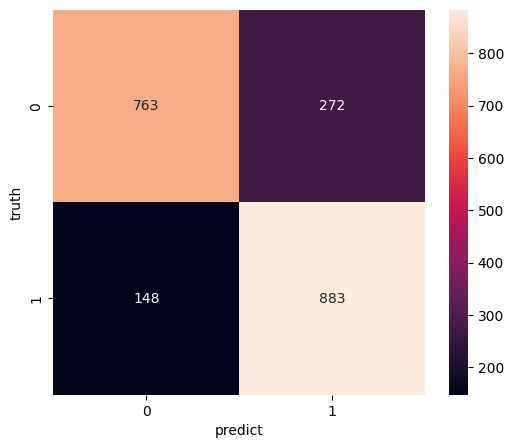

In [49]:
import seaborn as sb

cm = confusion_matrix(y_test , yp)

plt.figure(figsize=(6,5))
sb.heatmap(data = cm , annot = True , fmt='d')
plt.xlabel('predict')
plt.ylabel('truth')